In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset 

In [3]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data analysis 

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Preparing Data as input and output 

In [12]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X.shape, y.shape)

(50, 4) (50,)


## Encoding categorical data 

In [15]:
#as state is nominal we use OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
X=np.array (ct.fit_transform(X))

In [16]:
print(X.shape)

(50, 6)


## Splitting the dataset into the Training set and Test set 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [22]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40, 6) (10, 6)
(40,) (10,)


## Training the Multiple Linear Regression model on the Training set 

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results 

In [28]:
y_pred = regressor.predict(X_test)
print(y_pred)

[103015.20159794 132582.27760815 132447.73845174  71976.09851258
 178537.48221057 116161.24230168  67851.69209677  98791.73374686
 113969.43533014 167921.06569552]


In [30]:
print(regressor.predict([[1,0,0,160000,130000,300000]]))

[181566.92389384]


## Getting the final linear regression equation with the values of the coefficients 

In [33]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
42467.52924853696


## Variance score: 1 means perfect prediction 

In [36]:
print('Variance score: {}'.format(regressor.score(X_test, y_test))) 

Variance score: 0.9347068473282364


In [38]:
plt.style.use('fivethirtyeight') 

## Plotting residual errors in training data 

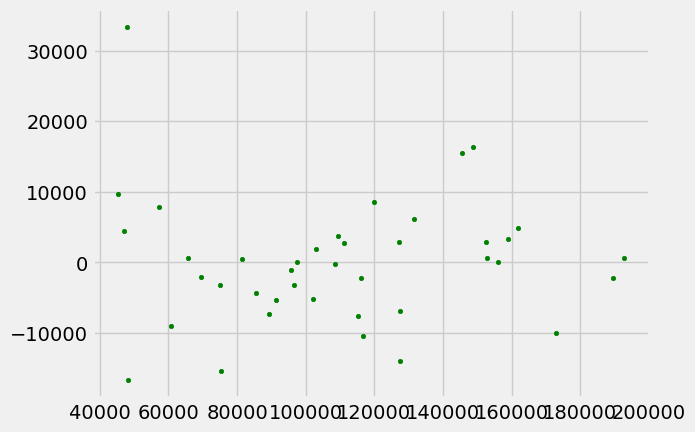

In [41]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data') 

## Plotting residual errors in test data 

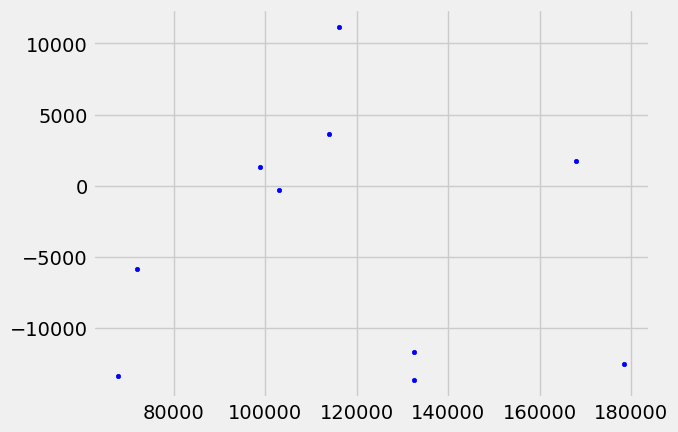

In [44]:
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data') 

## Plotting line for zero residual error 

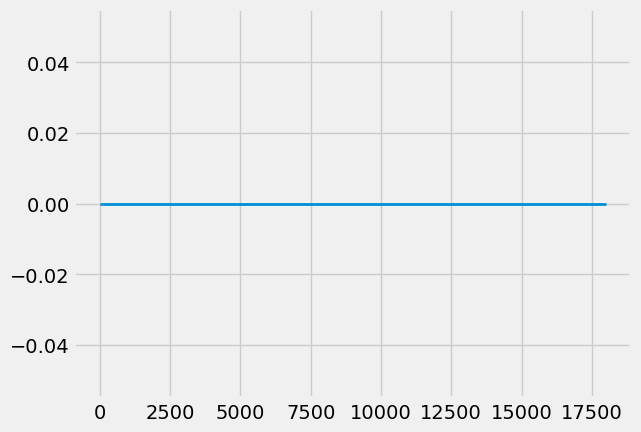

In [47]:
plt.hlines(y = 0, xmin = 0, xmax = 18000, linewidth = 2) 

## Plotting legend 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


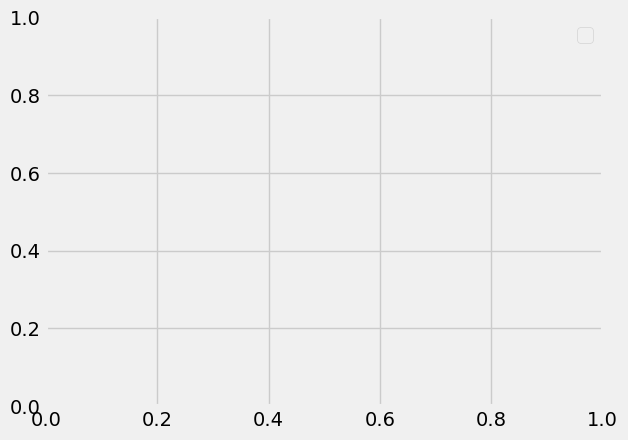

In [50]:
plt.legend(loc = 'upper right') 

## Plot title 

Text(0.5, 1.0, 'Residual errors')

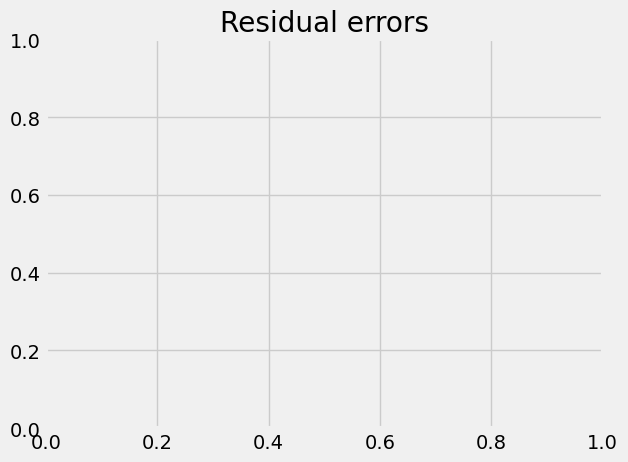

In [53]:
plt.title("Residual errors") 

## Function to show plot 

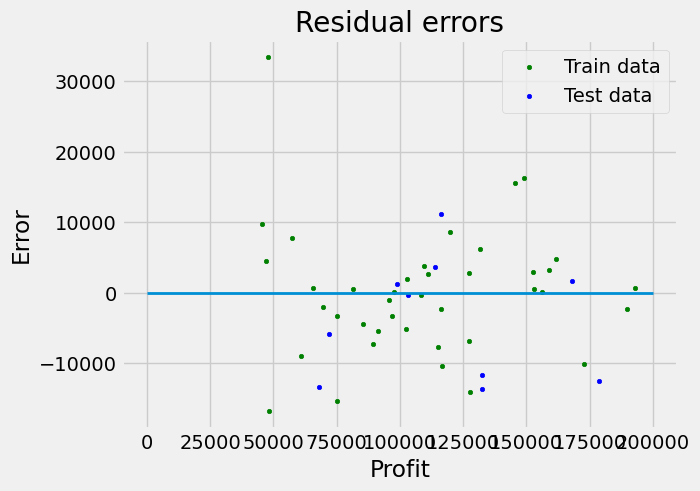

In [56]:
plt.style.use('fivethirtyeight') 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data') 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show() 

## Find the R^2 

In [59]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9347068473282364
